## Daily evet time returns

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from chart_studio.plotly import plot, iplot
import cufflinks as cf
cf.go_offline(connected=True)

In [3]:
return_df = pd.read_csv('../data/kospi/preprocessed/df_return.csv',index_col=0)*100 #%단위로 환산
abnormal_df = pd.read_csv('../data/return/abnormal_return.csv',index_col=0) #113평균값을 뺀 CAR
jaccard_df = pd.read_csv('../data/similarity/jaccard_df.csv',index_col=0)
cosine_df = pd.read_csv('../data/similarity/cosine_df.csv',index_col=0)
monthly_df = pd.read_csv('../data/similarity/monthly_sorted_jaccard.csv',index_col=0)

lv2_jaccard = jaccard_df.copy().loc[return_df.index] #거래일에 맞춰서 인덱싱
lv2_cosine = cosine_df.copy().loc[return_df.index]

In [4]:
val_idx,val_col = np.where(np.isfinite(lv2_jaccard))

In [5]:
# monthly_df.loc[20110629:,:]

In [6]:
# lv2_jaccard.iloc[val_idx,:]

In [7]:
monthly_df.iloc[val_idx,:].head(10)

,삼양홀딩스,유한양행,CJ대한통운,두산,대림산업,한국테크놀로지그룹,기아차,동아쏘시오홀딩스,SK하이닉스,영풍,...,현대백화점,한국금융지주,GS,하나금융지주,아모레퍼시픽,LF,후성,SK이노베이션,CJ제일제당,KB금융
20101102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Daily

daily announcement effect를 확인할 껀데 공시일 기준 전후 10일간의 CAR을 구할것임. -10일부터 시작하는 건데 이것도 유사도별로 sorting 할 필요가 있음.

논문에서는 Q1, Q5를 표기. 그럼 이걸 어떻게 보여줄 것인가.

예를들어 113개의 기업의 9년동안 유사도가 있음. 2011~2019라고 보자. Q1, Q5의 기업개수는 대충 46개(각23) 정도.

monthly Q1,Q5 index를 구한다 -> 해당 연도에 공시를 한 기업들 확인 -> 그 기업들의 공시일 기준 -10일 수익률부터 시작해서 CAR 누적수익률 저장 -> 평균내기 

1. monthly Q1, Q5 (boolean type)

2. 1번 중 공시를 한 기업들의 공시일자 check

3. 2에서 CAR index확인 후 -10일부터 +10까지 누적수익률을 리스트로 저장

In [8]:
monthly_df.loc[20110629:,:].head()

,삼양홀딩스,유한양행,CJ대한통운,두산,대림산업,한국테크놀로지그룹,기아차,동아쏘시오홀딩스,SK하이닉스,영풍,...,현대백화점,한국금융지주,GS,하나금융지주,아모레퍼시픽,LF,후성,SK이노베이션,CJ제일제당,KB금융
20110629,0.482558,0.852459,0.615385,0.579749,0.630503,0.203113,0.705706,0.534641,0.75,0.5762,...,0.873362,0.663158,0.903475,0.462889,0.577154,0.713235,0.633452,0.574394,0.755193,0.71663
20110630,0.482558,0.852459,0.615385,0.579749,0.630503,0.203113,0.705706,0.534641,0.75,0.5762,...,0.873362,0.663158,0.903475,0.462889,0.577154,0.713235,0.633452,0.574394,0.755193,0.71663
20110701,0.482558,0.852459,0.615385,0.579749,0.630503,0.203113,0.705706,0.534641,0.75,0.5762,...,0.873362,0.663158,0.903475,0.462889,0.577154,0.713235,0.633452,0.574394,0.755193,0.71663
20110702,0.482558,0.852459,0.615385,0.579749,0.630503,0.203113,0.705706,0.534641,0.75,0.5762,...,0.873362,0.663158,0.903475,0.462889,0.577154,0.713235,0.633452,0.574394,0.755193,0.71663
20110703,0.482558,0.852459,0.615385,0.579749,0.630503,0.203113,0.705706,0.534641,0.75,0.5762,...,0.873362,0.663158,0.903475,0.462889,0.577154,0.713235,0.633452,0.574394,0.755193,0.71663


In [9]:
def get_q(df_, lower_bound, upper_bound) : #quntile 설정해주면 해당 quantile에 해당하는 boolean값 반환. cross-sectional 기준
    low_q1_threshold = np.percentile(df_,lower_bound,1)
    low_q1_thres_mat = np.repeat(low_q1_threshold[:,np.newaxis],df_.shape[1],1)

    high_q1_threshold = np.percentile(df_,upper_bound,1)
    high_q1_thres_mat = np.repeat(high_q1_threshold[:,np.newaxis],df_.shape[1],1)
    
    low_bool_mat = low_q1_thres_mat > df_
    high_bool_mat1 = high_q1_thres_mat > df_
    
    low_bool_mat = low_q1_thres_mat > df_
    high_bool_mat = high_q1_thres_mat > df_
    
    return np.bitwise_and(high_bool_mat,~low_bool_mat)

In [10]:
q1_df = get_q(monthly_df.loc[20110324:,:],0,20) #Q1목록
q5_df = get_q(monthly_df.loc[20110324:,:],80,100) #Q5목록

In [11]:
q1_df

,삼양홀딩스,유한양행,CJ대한통운,두산,대림산업,한국테크놀로지그룹,기아차,동아쏘시오홀딩스,SK하이닉스,영풍,...,현대백화점,한국금융지주,GS,하나금융지주,아모레퍼시픽,LF,후성,SK이노베이션,CJ제일제당,KB금융
20110324,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20110325,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20110326,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20110327,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20110328,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20191227,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
20191228,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
20191229,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
20191230,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [12]:
get_after = pd.read_csv('../data/return/get_after.csv',index_col=0)
k_ls = [x for x in get_after.index]
k_list = list(map(lambda x: x.split('_') , k_ls))
filing_dic = dict(map(lambda x: x.split('_') , k_ls))

dict,key와 value 형태를 만들었으니 이걸로 위 df에서 해당값이 true,false인지 표시하게 하기 -> 그 기업들만 다시 get_after구성 후 누적수익률계산 끝하면 끝.

In [13]:
index_ls = [x[1] for x in k_list]
len(index_ls) #총 공시 index는 1017개
len(set(index_ls)) #unique한 공시 index는 총 60개

60

#### idea

get_after가 지금은 ~30일 수익률인데 -10~10일 수익률의 df 로 만든다. 추후이것을 cumsum하면끝이니깐

get_after의 index는 기업_공시일자로 구성되있는데 이는 q1_df,q5_df의 column과 index와 같다. 따라서 loc를 통해 해당 value가 true인 값들만 추출하게하는 index들을 뽑아내고 그것들만 따로 cumsum하면 쿼터별 daily event effect를 볼 수 있다.

In [14]:
int(k_list[0][1])

20110324

In [15]:
q1_df.head()

,삼양홀딩스,유한양행,CJ대한통운,두산,대림산업,한국테크놀로지그룹,기아차,동아쏘시오홀딩스,SK하이닉스,영풍,...,현대백화점,한국금융지주,GS,하나금융지주,아모레퍼시픽,LF,후성,SK이노베이션,CJ제일제당,KB금융
20110324,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20110325,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20110326,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20110327,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20110328,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
#유사도가 찍히는 개별공시들중에서 공시일자기준으로 Q1,과 Q5에 해당하는 index 생성
q1_list = [i for i in k_list if q1_df.loc[int(i[1]),i[0]]== True]

q5_list = [i for i in k_list if q5_df.loc[int(i[1]),i[0]]== True]

In [39]:
print(len(q5_list))
print(len(q1_list))

176
189


In [42]:
print(q1_list)

[['일양약품', '20110629'], ['고려제강', '20120329'], ['NAVER', '20120329'], ['삼양홀딩스', '20120330'], ['기아차', '20120330'], ['동아쏘시오홀딩스', '20120330'], ['영풍', '20120330'], ['현대건설', '20120330'], ['CJ', '20120330'], ['동국제강', '20120330'], ['대한항공', '20120330'], ['효성', '20120330'], ['녹십자', '20120330'], ['오뚜기', '20120330'], ['OCI', '20120330'], ['현대미포조선', '20120330'], ['유니드', '20120330'], ['대교', '20120330'], ['한섬', '20120330'], ['한국단자', '20120330'], ['한국가스공사', '20120330'], ['두산인프라코어', '20120330'], ['SK이노베이션', '20120330'], ['일양약품', '20120629'], ['CJ대한통운', '20130329'], ['SK하이닉스', '20130329'], ['금호석유', '20130329'], ['남해화학', '20130329'], ['KT&G', '20130329'], ['LG전자', '20130329'], ['동국제강', '20130401'], ['세아베스틸', '20130401'], ['대한항공', '20130401'], ['롯데정밀화학', '20130401'], ['롯데칠성', '20130401'], ['SK디스커버리', '20130401'], ['녹십자', '20130401'], ['OCI', '20130401'], ['고려아연', '20130401'], ['롯데케미칼', '20130401'], ['HDC', '20130401'], ['한국전력', '20130401'], ['SK텔레콤', '20130401'], ['한섬', '20130401'], ['두산중공업', '20130401'], 

얘들을 다시 _로 이어붙여서 수정된 get_after함수에서 인덱싱을 하면 q1,q5의 그룹별 CAR 수익률 추이를 확인할 수 있다.

##### get_after_filling 수정

In [18]:
def get_after_filing_return(df,windows=30) : #기업 columns와 rcp_index 토대로 누적수익률 (sim_type 상관없음)
    
    val_idx,val_col = np.where(np.isfinite(df)) 
    container = np.full(shape=(len(val_idx),windows),fill_value=np.nan)
    idx_ls = []
    for num,(idx,col) in enumerate(zip(val_idx,val_col)) : 
        tmp = return_df.iloc[idx:idx+windows,col].values
        if windows - len(tmp) > 0 : 
            tmp = np.array(tmp.tolist()+[np.nan]*(windows-len(tmp)))
        container[num] = tmp #한기업의 filing이후 window_size만큼의 수익률 저장
        
        tmp_idx = return_df.index[idx]
        tmp_col = return_df.columns[col]        
        idx_ls.append("{}_{}".format(tmp_col,tmp_idx))
    
    final_df = pd.DataFrame(data=container,index=idx_ls)     
    return final_df

In [19]:
def daily_filling_return(df,windows=21) : #기업 columns와 rcp_index 토대로 누적수익률 (sim_type 상관없음)
    
    val_idx,val_col = np.where(np.isfinite(df)) #value가 있는값들만
    container = np.full(shape=(len(val_idx),windows),fill_value=np.nan) #nan값을 채워져있는 빈 컨테이너 생성
    idx_ls = []
    for num,(idx,col) in enumerate(zip(val_idx,val_col)) : 
        tmp = abnormal_df.iloc[idx-10:idx+11,col].values #공시일 10일전부터 10일후까지의 수익률
        if windows - len(tmp) > 0 : 
            tmp = np.array(tmp.tolist()+[np.nan]*(windows-len(tmp)))
        container[num] = tmp #한기업의 filing이후 window_size만큼의 수익률 저장
        
        tmp_idx = abnormal_df.index[idx]
        tmp_col = abnormal_df.columns[col]        
        idx_ls.append("{}_{}".format(tmp_col,tmp_idx))
    
    final_df = pd.DataFrame(data=container,index=idx_ls)     
    return final_df

In [20]:
def check_daily_df(df,windows=71) : #기업 columns와 rcp_index 토대로 누적수익률 (sim_type 상관없음)
    
    val_idx,val_col = np.where(np.isfinite(df)) #value가 있는값들만
    container = np.full(shape=(len(val_idx),windows),fill_value=np.nan) #nan값을 채워져있는 빈 컨테이너 생성
    idx_ls = []
    for num,(idx,col) in enumerate(zip(val_idx,val_col)) : 
        tmp = abnormal_df.iloc[idx-10:idx+61,col].values #공시일 10일전부터 10일후까지의 수익률
        if windows - len(tmp) > 0 : 
            tmp = np.array(tmp.tolist()+[np.nan]*(windows-len(tmp)))
        container[num] = tmp #한기업의 filing이후 window_size만큼의 수익률 저장
        
        tmp_idx = abnormal_df.index[idx]
        tmp_col = abnormal_df.columns[col]        
        idx_ls.append("{}_{}".format(tmp_col,tmp_idx))
    
    final_df = pd.DataFrame(data=container,index=idx_ls)     
    return final_df

-10일째에 트레이딩을 시작하여 투자하였다고 가정하므로 -10값을 0으로 두고 -9일째부터의 수익률 value는 return_df의 -9를 사용한다.

-9일째가 (-10~-9)의 수익률이기 때문에

In [21]:
return_daily_df = daily_filling_return(lv2_jaccard)
return_daily_df.columns = [x for x in range(-10,11,1)]
return_daily_df.head()

,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,...,1,2,3,4,5,6,7,8,9,10
LF_20110324,-0.864971,0.394046,0.620652,-2.161406,-0.997768,-1.992262,-0.651348,2.533920,-2.110675,-0.509888,...,-1.736685,-0.868113,1.854519,0.061284,-0.707948,0.708429,0.109543,-2.655200,0.527720,3.520492
S&T모티브_20110325,-0.365591,-2.967168,1.079944,-1.184458,-0.535476,-2.534171,-0.728460,1.119753,-1.318481,-1.023424,...,0.330751,-2.425797,-2.286245,2.631999,-1.142051,-0.702774,-1.643996,-0.465856,-2.651792,-1.483394
LG디스플레이_20110328,4.051665,0.536527,-1.628903,-1.514114,-2.326640,-0.978316,-2.647621,-0.161456,-1.402045,0.193801,...,-3.114462,-2.285761,1.181895,2.071565,0.366561,2.539799,0.189882,0.696966,0.886633,-1.369851
고려제강_20110329,-0.369315,0.392048,1.302489,-0.626475,1.125650,-0.114492,-0.023588,0.210137,0.403682,4.360955,...,-0.966113,-0.801899,-1.477266,-0.559392,0.426631,0.563244,0.646922,0.396439,2.681487,1.176420
유한양행_20110330,-1.351125,-1.078409,-1.191889,-0.014687,-0.045442,-0.501264,0.355107,0.474181,0.666885,-2.278460,...,-3.679086,-0.980761,-0.394886,0.864720,0.523686,-0.179205,-1.464544,-0.983616,-0.392370,-0.699949


In [22]:
pre_check_df = check_daily_df(lv2_jaccard)
pre_check_df.columns = [x for x in range(-10,61,1)]
pre_check_df[-10] = 0
pre_check_df = pre_check_df.cumsum(1)
pre_check_df.head()

,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,...,51,52,53,54,55,56,57,58,59,60
LF_20110324,0.0,0.394046,1.014698,-1.146708,-2.144477,-4.136738,-4.788086,-2.254166,-4.364842,-4.874730,...,18.901933,14.902804,14.629668,15.326015,16.538768,22.035035,23.161646,26.167007,23.480345,20.976597
S&T모티브_20110325,0.0,-2.967168,-1.887224,-3.071682,-3.607158,-6.141329,-6.869789,-5.750036,-7.068516,-8.091940,...,-23.842288,-24.636265,-21.421387,-19.280349,-19.490361,-17.986391,-17.087812,-9.819132,-12.663059,-9.637661
LG디스플레이_20110328,0.0,0.536527,-1.092375,-2.606489,-4.933130,-5.911446,-8.559068,-8.720523,-10.122568,-9.928767,...,-20.759701,-22.337279,-24.689831,-26.905440,-26.867269,-34.174121,-34.831722,-32.499880,-31.588032,-33.526576
고려제강_20110329,0.0,0.392048,1.694537,1.068062,2.193713,2.079221,2.055633,2.265770,2.669451,7.030406,...,21.440225,20.259382,20.075531,19.252183,25.109483,24.880714,22.474919,24.900613,22.274683,19.910191
유한양행_20110330,0.0,-1.078409,-2.270297,-2.284984,-2.330426,-2.831690,-2.476583,-2.002402,-1.335517,-3.613977,...,-19.978749,-18.627215,-15.635921,-17.997387,-19.615054,-18.977190,-18.472301,-21.008090,-20.644999,-21.098405


### CAR 누적수익률

In [46]:
cum_daily_df.loc['일양약품_20110629':,:]

,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,...,1,2,3,4,5,6,7,8,9,10
일양약품_20110629,0.0,-0.029773,-0.871292,4.315522,3.142072,1.558854,3.529780,6.725489,7.764063,19.255629,...,20.211213,19.418378,22.250504,23.593101,27.754434,35.527038,36.243747,44.783267,48.430610,46.269886
삼성증권_20110629,0.0,-0.394892,-0.647742,-1.877476,1.290641,2.180011,2.953332,2.994421,2.606844,2.405405,...,4.529563,3.863548,5.519801,4.357910,3.745694,2.579798,2.681753,-0.155948,-1.670562,-2.268533
한국금융지주_20110629,0.0,0.646827,2.278218,4.973406,4.096692,4.617628,1.201760,3.189834,1.367373,2.401018,...,0.768749,-0.578102,7.742521,7.597022,10.647015,13.027678,12.300249,10.542592,11.029819,8.802317
한온시스템_20120319,0.0,-2.379594,-1.715115,-7.145056,-6.185357,-5.119710,-5.181654,-5.999188,-6.579715,-8.291131,...,-6.982196,-5.788266,-5.778258,-6.401704,-7.055830,-8.269514,-5.956500,-4.045058,-5.314826,-6.771640
신세계_20120327,0.0,2.637011,2.724636,3.198330,2.368906,1.203734,0.321726,-1.828117,-1.772830,-1.704670,...,-2.188655,0.036717,-1.573844,2.287229,2.392190,6.457018,5.587487,9.526694,11.190530,11.255585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
후성_20190401,0.0,0.496941,-1.239619,5.029425,3.722590,-0.532935,-1.848612,-2.767299,-5.761925,-5.992173,...,-4.407512,-4.129818,-4.674636,-4.586814,-4.295081,-3.069461,-3.881232,-3.690603,-3.255733,-3.762223
SK이노베이션_20190401,0.0,1.533210,1.992455,2.937759,3.652040,2.962989,0.705435,1.080373,1.308627,-3.485783,...,-3.305744,-3.506523,-4.066340,-3.547180,-3.241587,-3.166863,-4.534414,-3.655310,-4.502640,-0.289222
CJ제일제당_20190401,0.0,1.101170,0.403104,0.998102,0.846216,0.925213,1.590463,2.623234,1.969971,1.239471,...,0.680985,-0.341711,-0.936538,-2.004047,-0.108259,0.118672,-0.288279,-1.741843,-1.703298,-2.390753
KB금융_20190401,0.0,-0.069953,-0.665294,-0.613661,-1.318581,-1.941136,-2.727239,-2.498195,-3.160850,-1.502522,...,4.422469,3.955328,3.998741,3.480198,2.853270,2.483549,2.817480,2.881367,2.856676,3.025555


In [23]:
cum_daily_df = return_daily_df.copy()
cum_daily_df[-10] = 0
cum_daily_df = cum_daily_df.cumsum(1)
cum_daily_df.head()

,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,...,1,2,3,4,5,6,7,8,9,10
LF_20110324,0.0,0.394046,1.014698,-1.146708,-2.144477,-4.136738,-4.788086,-2.254166,-4.364842,-4.874730,...,-6.905133,-7.773247,-5.918728,-5.857443,-6.565391,-5.856963,-5.747420,-8.402620,-7.874900,-4.354409
S&T모티브_20110325,0.0,-2.967168,-1.887224,-3.071682,-3.607158,-6.141329,-6.869789,-5.750036,-7.068516,-8.091940,...,-6.463735,-8.889532,-11.175777,-8.543778,-9.685829,-10.388603,-12.032598,-12.498454,-15.150247,-16.633641
LG디스플레이_20110328,0.0,0.536527,-1.092375,-2.606489,-4.933130,-5.911446,-8.559068,-8.720523,-10.122568,-9.928767,...,-12.895065,-15.180826,-13.998931,-11.927365,-11.560805,-9.021006,-8.831124,-8.134158,-7.247524,-8.617376
고려제강_20110329,0.0,0.392048,1.694537,1.068062,2.193713,2.079221,2.055633,2.265770,2.669451,7.030406,...,6.625602,5.823703,4.346437,3.787046,4.213677,4.776921,5.423842,5.820281,8.501768,9.678188
유한양행_20110330,0.0,-1.078409,-2.270297,-2.284984,-2.330426,-2.831690,-2.476583,-2.002402,-1.335517,-3.613977,...,-6.925547,-7.906308,-8.301194,-7.436474,-6.912788,-7.091993,-8.556537,-9.540153,-9.932523,-10.632471


생성한 return_daily_df는 전체 모든 사업보고서의 공시일 -10~10일의 수익률집합이다.

이제 앞에서 만든 개별 기업의 공시일기준 으로 sorting한 q1,q5를 가지고 quarter별 daily_df를 생성해보자.

In [24]:
#q1과 q5 기업들의 index명
q1_index = []
for i in q1_list:
    q1_index.append("{}_{}".format(i[0],i[1]))
q5_index = []
for i in q5_list:
    q5_index.append("{}_{}".format(i[0],i[1]))

In [25]:
len(set(return_daily_df.index) & set(q1_index))

189

In [26]:
#q1,q5만의 daily_df
q1_daily_df = cum_daily_df.loc[q1_index,:]
q5_daily_df = cum_daily_df.loc[q5_index,:]
q5_daily_df.head()

,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,...,1,2,3,4,5,6,7,8,9,10
삼성화재_20110629,0.0,2.780565,-0.480520,1.337639,-0.174669,-1.375868,3.029932,1.698098,0.679060,-1.439735,...,3.067036,2.274201,0.192946,0.174999,1.503351,-0.358966,-1.662634,-2.288083,-2.187507,0.721650
한온시스템_20120319,0.0,-2.379594,-1.715115,-7.145056,-6.185357,-5.119710,-5.181654,-5.999188,-6.579715,-8.291131,...,-6.982196,-5.788266,-5.778258,-6.401704,-7.055830,-8.269514,-5.956500,-4.045058,-5.314826,-6.771640
금호석유_20120329,0.0,0.735900,0.491271,-2.155948,-0.969610,-4.285445,-2.146825,-5.403495,-4.865864,-6.506901,...,-4.904521,-5.579661,-6.735574,-9.718413,-11.482129,-7.876326,-5.109549,-3.605819,-2.879496,-7.390856
LG상사_20120330,0.0,-2.762615,-3.454593,-2.752481,-3.187719,-2.189035,-2.078040,-3.163332,-3.461184,-4.627511,...,-5.318043,-10.733034,-8.970871,-11.719070,-11.089725,-13.384222,-9.143360,-8.658590,-9.063812,-9.795494
아모레G_20120330,0.0,-0.437611,0.552579,3.422243,3.722384,3.392166,4.457488,2.784605,3.241470,5.339243,...,4.841292,5.506735,6.601052,5.755433,9.391782,9.945662,10.002845,9.657740,8.139592,9.161106


In [27]:
q1_dd = q1_daily_df.copy()
q1_dd.index = [str(x)[-8:-4] for x in q1_daily_df.index]
q1_dd.index.value_counts()

2018    29
2013    24
2012    23
2016    23
2015    23
2017    22
2019    22
2014    22
2011     1
dtype: int64

In [28]:
q5_dd = q5_daily_df.copy()
q5_dd.index = [str(x)[-8:-4] for x in q5_daily_df.index]
q5_dd.index.value_counts()

2013    24
2014    23
2017    22
2019    22
2016    22
2015    22
2018    20
2012    20
2011     1
dtype: int64

In [29]:
q1_check_df = pre_check_df.loc[q1_index,:]
q5_check_df = pre_check_df.loc[q5_index,:]

In [30]:
#  차트 설정
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

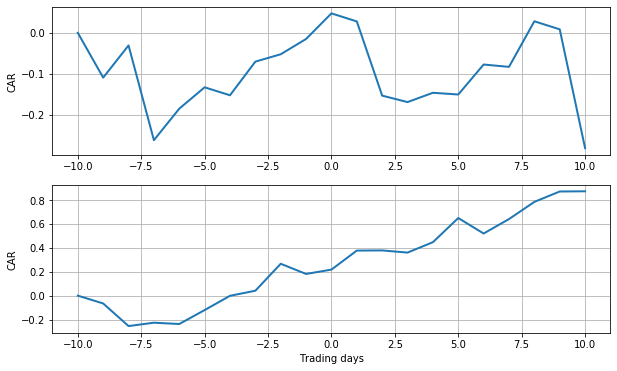

In [31]:
ax1 = plt.subplot(2,1,1)
plt.plot(q1_daily_df.mean(),label = 'Q1')
plt.ylabel('CAR')
ax2 = plt.subplot(2,1,2)
plt.plot(q5_daily_df.mean(),label= 'Q5')
plt.xlabel('Trading days')
plt.ylabel('CAR')


plt.show()


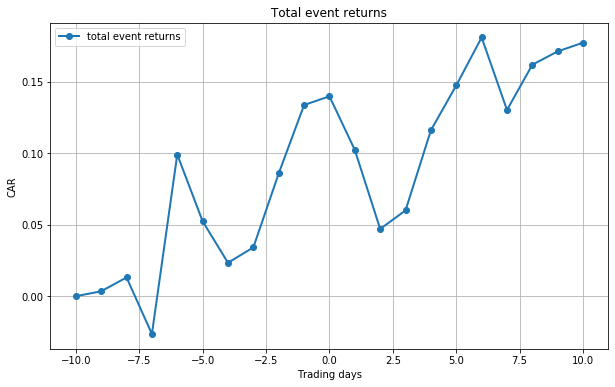

In [32]:
plt.plot(cum_daily_df.mean(), marker="o", label = 'total event returns')
plt.legend(loc=2)
plt.xlabel('Trading days')
plt.ylabel('CAR')
plt.title('Total event returns')
plt.show()

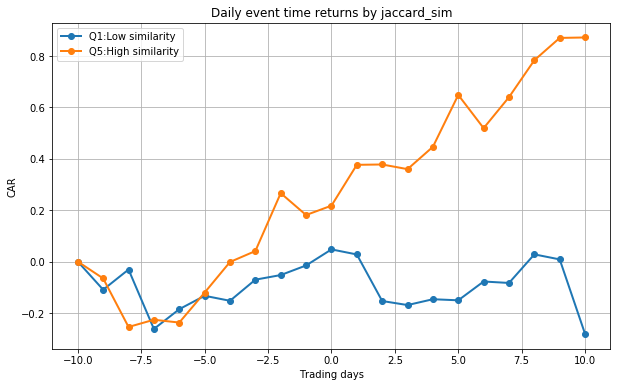

In [49]:
plt.plot(q1_daily_df.mean(), marker="o", label = 'Q1:Low similarity')
plt.plot(q5_daily_df.mean(), marker="o", label = 'Q5:High similarity')

plt.legend(loc=2)
plt.xlabel('Trading days')
plt.ylabel('CAR')
plt.title('Daily event time returns by jaccard_sim')
plt.show()

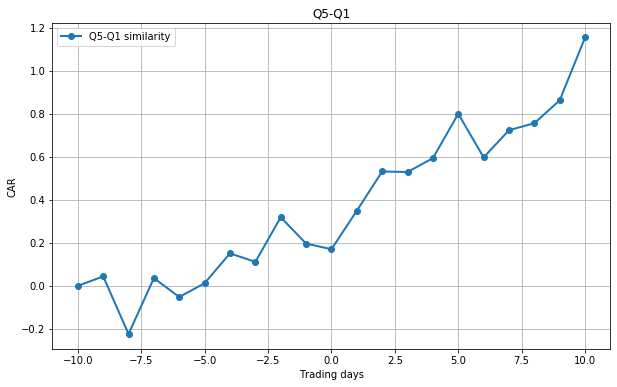

In [34]:
plt.plot((q5_daily_df.mean()-q1_daily_df.mean()),marker="o",label = 'Q5-Q1 similarity')
plt.xlabel('Trading days')
plt.ylabel('CAR')
plt.legend()
plt.title('Q5-Q1')
plt.show()

## -10~+60일까지

In [35]:
pre_check_df.head()

,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,...,51,52,53,54,55,56,57,58,59,60
LF_20110324,0.0,0.394046,1.014698,-1.146708,-2.144477,-4.136738,-4.788086,-2.254166,-4.364842,-4.874730,...,18.901933,14.902804,14.629668,15.326015,16.538768,22.035035,23.161646,26.167007,23.480345,20.976597
S&T모티브_20110325,0.0,-2.967168,-1.887224,-3.071682,-3.607158,-6.141329,-6.869789,-5.750036,-7.068516,-8.091940,...,-23.842288,-24.636265,-21.421387,-19.280349,-19.490361,-17.986391,-17.087812,-9.819132,-12.663059,-9.637661
LG디스플레이_20110328,0.0,0.536527,-1.092375,-2.606489,-4.933130,-5.911446,-8.559068,-8.720523,-10.122568,-9.928767,...,-20.759701,-22.337279,-24.689831,-26.905440,-26.867269,-34.174121,-34.831722,-32.499880,-31.588032,-33.526576
고려제강_20110329,0.0,0.392048,1.694537,1.068062,2.193713,2.079221,2.055633,2.265770,2.669451,7.030406,...,21.440225,20.259382,20.075531,19.252183,25.109483,24.880714,22.474919,24.900613,22.274683,19.910191
유한양행_20110330,0.0,-1.078409,-2.270297,-2.284984,-2.330426,-2.831690,-2.476583,-2.002402,-1.335517,-3.613977,...,-19.978749,-18.627215,-15.635921,-17.997387,-19.615054,-18.977190,-18.472301,-21.008090,-20.644999,-21.098405


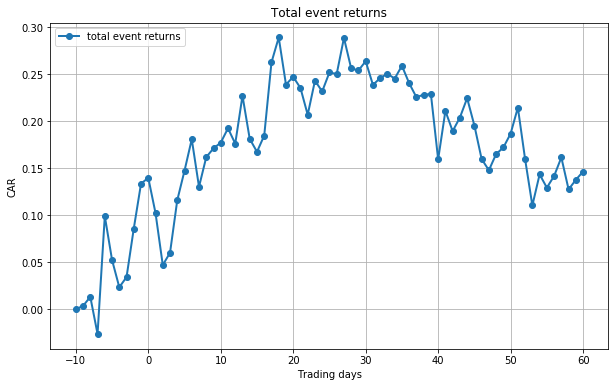

In [36]:
plt.plot(pre_check_df.mean(), marker="o", label = 'total event returns')
plt.legend(loc=2)
plt.xlabel('Trading days')
plt.ylabel('CAR')
plt.title('Total event returns')
plt.show()

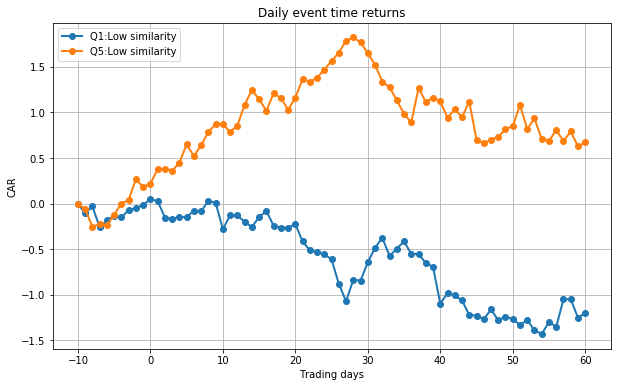

In [37]:
plt.plot(q1_check_df.mean(), marker="o", label = 'Q1:Low similarity')
plt.plot(q5_check_df.mean(), marker="o", label = 'Q5:High similarity')

plt.legend(loc=2)
plt.xlabel('Trading days')
plt.ylabel('CAR')
plt.title('Daily event time returns')
plt.show()

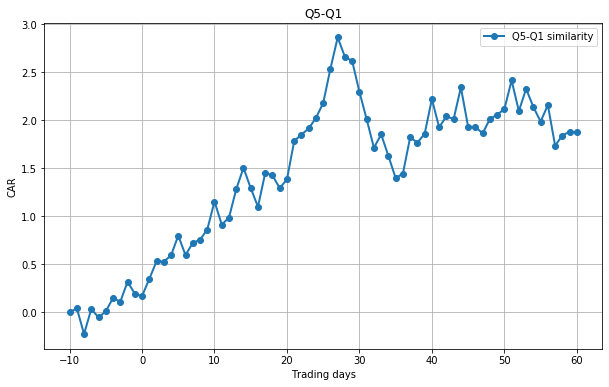

In [38]:
plt.plot((q5_check_df.mean()-q1_check_df.mean()),marker="o",label = 'Q5-Q1 similarity')
plt.xlabel('Trading days')
plt.ylabel('CAR')
plt.legend()
plt.title('Q5-Q1')
plt.show()